In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm

import MMTMSS.models.simple_cascade as sc

### Determinist cascade 

In [5]:
dc = sc.multivariate_cascade([[0.3,0.2],[0.25,0.25]], [[0.25,0.25],[0.3,0.2]],6)

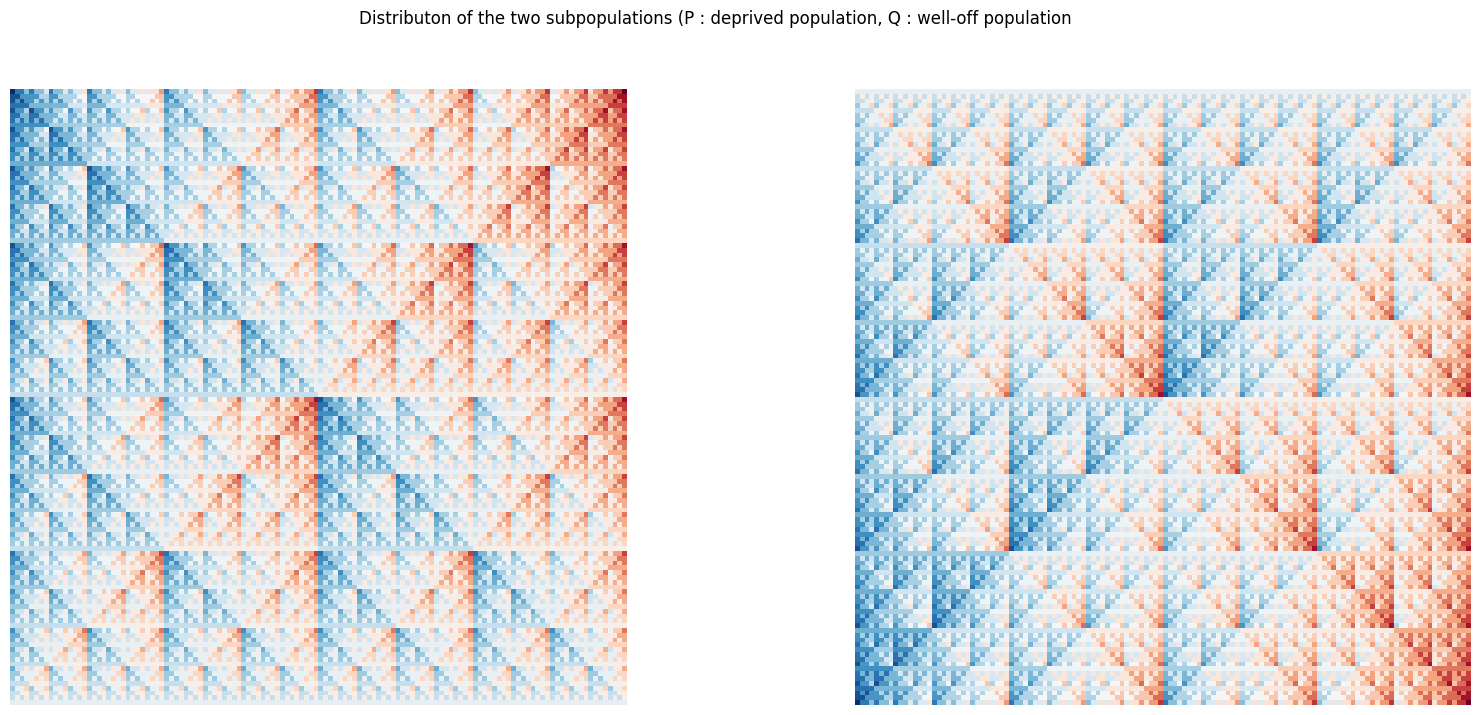

In [182]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

ax1.matshow(dc[:,:,0], cmap='RdBu', norm=LogNorm(vmin=np.min(dc), vmax=np.max(dc)))
ax1.axis("off")
fig.suptitle('Distributon of the two subpopulations (P : deprived population, Q : well-off population')
ax2.imshow(dc[:,:,1], cmap='RdBu', norm=LogNorm(vmin=np.min(dc), vmax=np.max(dc)))
ax2.axis("off");

In [7]:
ratio = dc[:,:,0] / (dc[:,:,0] + dc[:,:,1]) * 100

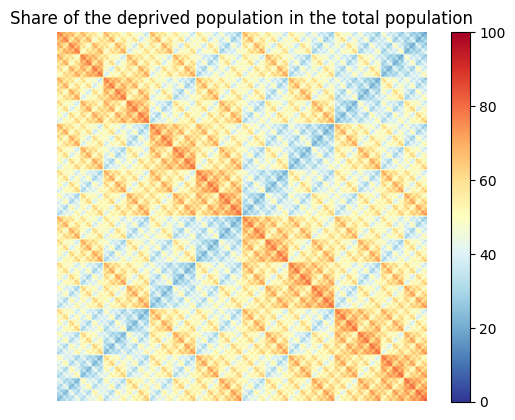

In [8]:
ax=plt.imshow(ratio, vmin=0, vmax=100, cmap="RdYlBu_r")
plt.axis('off');
plt.title('Share of the deprived population in the total population');
plt.colorbar();

### Random lognormal cascade

In [76]:
lnc = sc.multivariate_lognormal_cascade(6, sigma1=1, sigma2=1, corr=0.5)

In [77]:
lnc.shape

(128, 128, 2)

In [78]:
ratio = lnc[:,:,0] / (lnc[:,:,0] + lnc[:,:,1]) * 100

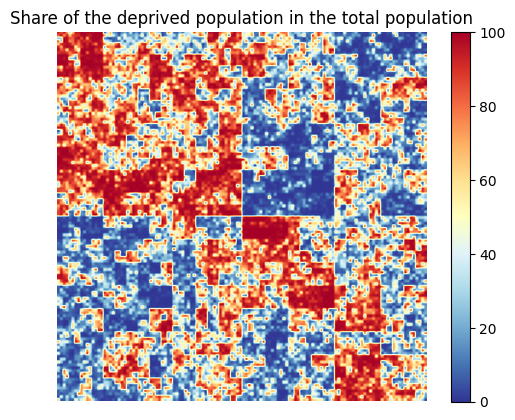

In [79]:
plt.imshow(ratio, vmin=0, vmax=100, cmap="RdYlBu_r")
plt.axis('off');
plt.title('Share of the deprived population in the total population');
plt.colorbar();

In [80]:
def downsizing_sum(a, factor):    
    """
    `a` is the 3-dim input array
    `factors` is the blocksize on which averaging is to be performed
    """

    
    if factor==1:
        padx=0
        pady=0
    else :
        padx= a.shape[0] - (a.shape[0] // factor)*factor 
        pady= a.shape[1] - (a.shape[1] // factor)*factor 
        
    
    a =  np.pad(a, ((0, padx), (0, pady), (0,0))) 
    factors = np.array([factor,factor,1])
    sh = np.column_stack([a.shape//factors, factors]).ravel()
    b = a.reshape(sh).sum(tuple(range(1, 2*a.ndim, 2)))

    return b


In [81]:
def entropy_segregation( frac):
        ptot = np.sum(frac, axis=2)
        Prob = frac / ptot[:, :, np.newaxis]
                #print(Prob[1,1,:])
        P0 = np.sum(frac[:,:,0]) / np.sum(frac[:,:,0] +  frac[:,:,1])
        P1 = np.sum(frac[:,:,1]) / np.sum(frac[:,:,0] +  frac[:,:,1])
        Entropie_globale = -np.log2(P0)*P0 -np.log2(P1)*P1   
        return((Entropie_globale + np.sum(np.sum(np.log2(Prob) * Prob, axis=2) * ptot) / np.sum(ptot) )/Entropie_globale )

In [83]:
entropy_segregation(downsizing_sum(lnc,2))

0.5974852676163236